In [1]:
import pandas  as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [3]:
taxi = pd.read_csv('3_taxi_peru.csv', sep = ';', parse_dates=['start_at', 'end_at', 'arrived_at'])


In [22]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,0.0,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,0.0,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,0.0,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday


In [37]:
taxi.source.unique()

array(['iPhone', 'Android', 'web', 'iPad', nan, 'Wap'], dtype=object)

In [5]:
taxi['start_at'] = pd.to_datetime(taxi.start_at)
taxi['end_at'] = pd.to_datetime(taxi.end_at)
taxi['arrived_at'] = pd.to_datetime(taxi.arrived_at)

In [6]:
taxi['wait_time'] = taxi['arrived_at'] - taxi['start_at']
taxi['wait_time'] = taxi.wait_time.astype('timedelta64[m]')

In [10]:
taxi['wait_time'] = taxi.wait_time.fillna(0)

In [14]:
taxi.query("wait_time > 0 and start_type == 'reserved'").groupby('driver_id')\
    .agg({'start_type':'count'})\
    .sort_values('start_type', ascending = False)

,start_type
driver_id,
406921adcca37705ef527b4246c0cfea,67
d665fb9f75ef5d9cd0fd89479380ba78,59
ec84a73745199ff840ecafcb924383ad,57
56f59b58bcbbd1cdabc3652e713134c2,51
c814db2127582cf95dea1f74f43127c2,45
...,...
d7bf644eb441cda6127f91addebb85c4,1
b68895736389f2949faa8c73555b81ac,1
8cb98e46b27af1e6fca8768a2a6329f3,1


In [21]:
taxi['month'] = taxi.start_at.dt.month
taxi['weekday'] = taxi.start_at.dt.strftime('%A')

In [29]:
by_month = taxi.groupby('month', as_index = False)\
    .agg({'journey_id':'nunique'})

In [30]:
by_month

,month,journey_id
0,1,575
1,2,770
2,3,986
3,4,1448
4,5,1585
5,6,1939
6,7,1516
7,8,2120
8,9,2598
9,10,3240


<AxesSubplot:xlabel='month', ylabel='journey_id'>

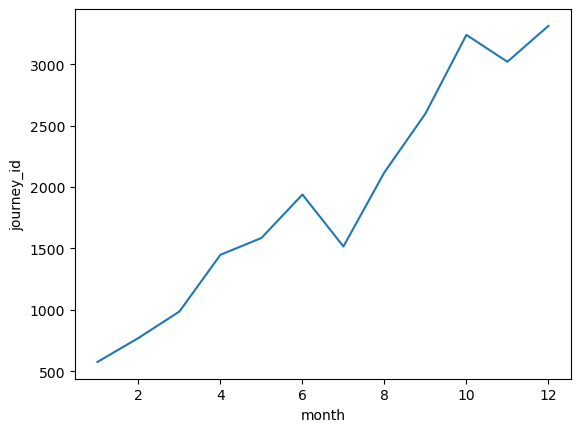

In [36]:
sns.lineplot(data=by_month, x="month", y="journey_id")

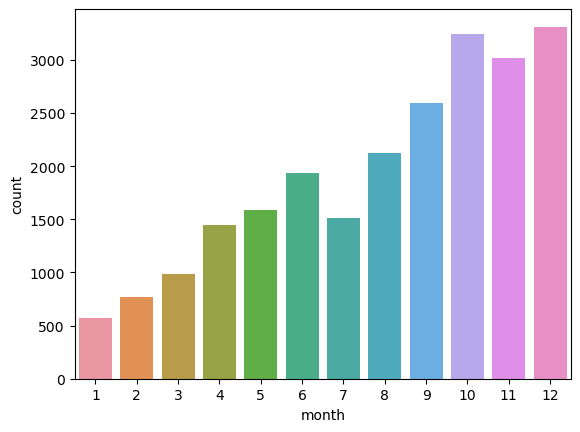

In [20]:
sns.countplot(x=taxi["month"]);

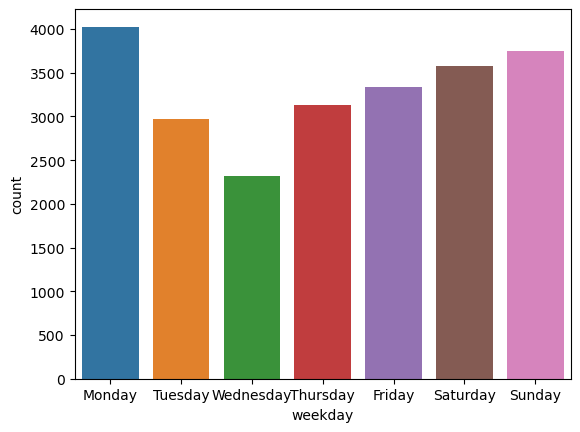

In [24]:
sns.countplot(x=taxi["weekday"], order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);

<AxesSubplot:>

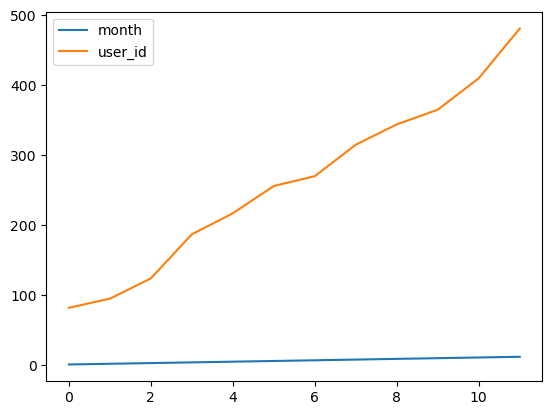

In [47]:
taxi.query("source == 'iPhone' or source == 'Android' or source == 'iPad'").groupby('month', as_index = False)\
    .user_id.nunique().plot()

In [51]:
y = taxi.shape[0]
x = taxi.shape[1]
print('df has {} rows and {} columns'.format(y,x))

df has 23111 rows and 22 columns
